In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movie_dataset.csv')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0.0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1.0,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2.0,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3.0,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4.0,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4805 non-null   float64
 1   budget                4803 non-null   float64
 2   genres                4805 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   float64
 5   keywords              4805 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   float64
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [4]:
features = ['genres', 'keywords', 'cast', 'director']

In [5]:
df.isnull().sum()

index                      0
budget                     2
genres                     0
homepage                3093
id                         2
keywords                   0
original_language          2
original_title             2
overview                   5
popularity                 2
production_companies       2
production_countries       2
release_date               3
revenue                    2
runtime                    4
spoken_languages           2
status                     2
tagline                  846
title                      0
vote_average               2
vote_count                 2
cast                       0
crew                       2
director                   0
combined_features          0
dtype: int64

<AxesSubplot:>

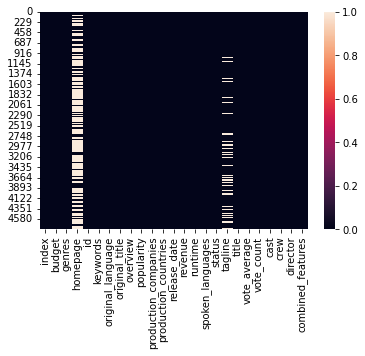

In [6]:
sns.heatmap(df.isnull())

In [7]:
for feature in features:
    df[feature].fillna(' ', inplace=True)

In [8]:
df.isnull().sum()

index                      0
budget                     2
genres                     0
homepage                3093
id                         2
keywords                   0
original_language          2
original_title             2
overview                   5
popularity                 2
production_companies       2
production_countries       2
release_date               3
revenue                    2
runtime                    4
spoken_languages           2
status                     2
tagline                  846
title                      0
vote_average               2
vote_count                 2
cast                       0
crew                       2
director                   0
combined_features          0
dtype: int64

In [9]:
def combine_features(row):
    return row['genres'] + " " + row['keywords'] + " " + row['cast'] + " " + row['director']

In [10]:
df['combined_features'] = df[features].apply(combine_features, axis = 1)

In [11]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0.0,237000000.0,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995.0,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,1.0,300000000.0,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285.0,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,2.0,245000000.0,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647.0,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,3.0,250000000.0,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026.0,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,4.0,260000000.0,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529.0,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Action Adventure Science Fiction based on nove...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
cv = CountVectorizer()

In [14]:
count_matrix = cv.fit_transform(df['combined_features'])

In [15]:
cosine_sim = cosine_similarity(count_matrix)

In [16]:
cosine_sim.shape

(4805, 4805)

In [17]:
cosine_sim[0]

array([1.        , 0.10540926, 0.12038585, ..., 0.        , 0.23210354,
       0.23210354])

In [18]:
cosine_sim[1]

array([0.10540926, 1.        , 0.0761387 , ..., 0.        , 0.22019275,
       0.22019275])

In [19]:
def get_title(index):
    return df[df['index'] == index]['title'].iloc[0]

def get_index(title):
    return int(df[df['title'].str.lower() == title.lower()]['index'].iloc[0])

# get_title(4000)
get_index('avatar')

0

In [20]:
movie_user_likes = input("Enter a movie you like: ")

Enter a movie you like: avatar


In [22]:
movie_index = get_index(movie_user_likes)

In [24]:
similar_movies = cosine_sim[movie_index]
similar_movies

array([1.        , 0.10540926, 0.12038585, ..., 0.        , 0.23210354,
       0.23210354])

In [32]:
sorted_movies = sorted(enumerate(similar_movies), 
                       reverse=True, key=lambda movie:movie[1])[1:]

sorted_movies

[(94, 0.42339019740572564),
 (2403, 0.3774256780481986),
 (3208, 0.3464101615137755),
 (47, 0.34426518632954817),
 (56, 0.33596842045264647),
 (3158, 0.33333333333333337),
 (2198, 0.31426968052735443),
 (2696, 0.30792014356780045),
 (4401, 0.28867513459481287),
 (1531, 0.2858966759567453),
 (278, 0.2810913475705226),
 (1053, 0.2809003238667948),
 (239, 0.2765204519281134),
 (838, 0.2749859704614352),
 (61, 0.27498597046143514),
 (232, 0.2694301256218254),
 (4332, 0.2694301256218254),
 (661, 0.264197974633739),
 (4593, 0.264197974633739),
 (3730, 0.2592592592592593),
 (1650, 0.2501595914621521),
 (158, 0.24618298195866545),
 (461, 0.24618298195866545),
 (1083, 0.24618298195866542),
 (322, 0.24077170617153845),
 (228, 0.24077170617153842),
 (539, 0.24077170617153842),
 (577, 0.23570226039551587),
 (1990, 0.23570226039551587),
 (1652, 0.23570226039551584),
 (4803, 0.2321035412742638),
 (4804, 0.2321035412742638),
 (10, 0.23094010767585035),
 (400, 0.23094010767585035),
 (4, 0.230940107675